In [1]:
from sklearn.datasets import load_digits

In [2]:
mnist=load_digits()

In [3]:
print(mnist.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X=mnist.data
y=mnist.target

In [5]:
y.unique()

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [6]:
import numpy as np
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
u=np.random.randint(10,20,(3,5))

In [11]:
u

array([[19, 19, 10, 18, 15],
       [13, 16, 16, 14, 10],
       [13, 19, 12, 11, 18]])

In [12]:
u=u.reshape(1,-1)

In [13]:
u

array([[19, 19, 10, 18, 15, 13, 16, 16, 14, 10, 13, 19, 12, 11, 18]])

In [14]:
u.shape

(1, 15)

In [15]:
u.ndim

2

In [17]:
u=u.ravel()

In [18]:
u

array([19, 19, 10, 18, 15, 13, 16, 16, 14, 10, 13, 19, 12, 11, 18])

In [19]:
u.shape

(15,)

In [20]:
u.ndim

1

In [21]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
x_1=X[0].reshape(8,8)

In [24]:
x_1

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## Visualise the result

In [26]:
import matplotlib.pyplot as plt

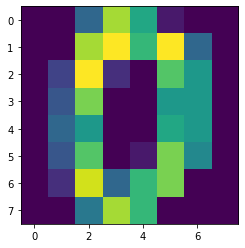

In [27]:
plt.imshow(x_1)

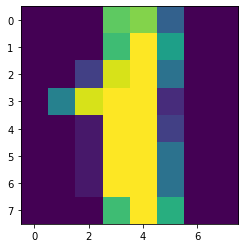

In [28]:
x_2=X[1].reshape(8,8)
plt.imshow(x_2)

In [30]:
y[0]

0

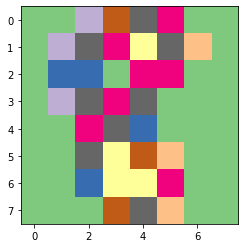

In [42]:
x_100=X[699].reshape(8,8)
plt.imshow(x_100,cmap="Accent")

In [43]:
y[699]

8

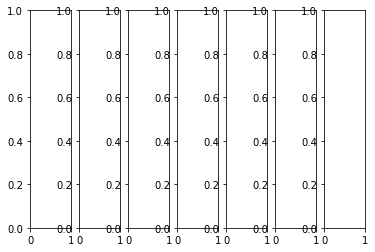

In [46]:
fig,ax=plt.subplots(1,7);

In [47]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

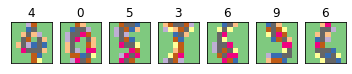

In [55]:
for k,axis in enumerate(ax):
    i=k+100
    img = X[i].reshape(8,8)
    axis.imshow(img,cmap="Accent")
    axis.set_title(y[i])
    axis.set_xticks([])
    axis.set_yticks([])
    
fig
    
    

In [49]:
list(enumerate([2,3,4,5]))

[(0, 2), (1, 3), (2, 4), (3, 5)]

In [56]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier()
grid_model=GridSearchCV(knn,param_grid={"n_neighbors":range(1,30),"p":[2,4,5,10,8,6]})

In [60]:
grid_model.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [2, 4, 5, 10, 8, 6]})

In [61]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [62]:
grid_model.best_params_

{'n_neighbors': 2, 'p': 2}

In [63]:
grid_model.best_score_

0.9671711544413494

In [64]:
randomized_model=RandomizedSearchCV(knn,
                                    param_distributions={'n_neighbors': range(1, 30),
                                                         'p': [2, 4, 5, 10, 8, 6]})

In [65]:
randomized_model.fit(X,y)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 30),
                                        'p': [2, 4, 5, 10, 8, 6]})

In [66]:
randomized_model.best_params_

{'p': 4, 'n_neighbors': 5}

In [67]:
randomized_model.best_score_

0.9660662333642834

In [68]:
import pandas as pd

In [70]:
pd.read_csv("../../../datasets/titanic/train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
